(44, 2)
[[49, 49, 0], [49, 98, 0], [50, 99, 0], [49, 101, 0], [55, 101, 0], [56, 100, 0], [57, 101, 0], [58, 100, 0], [60, 101, 0], [65, 100, 0], [66, 101, 0], [102, 101, 0], [103, 100, 0], [104, 101, 0], [177, 101, 0], [178, 100, 0], [179, 101, 0], [197, 101, 0], [198, 100, 0], [201, 101, 0], [200, 100, 0], [201, 99, 0], [201, 80, 0], [200, 79, 0], [201, 74, 0], [198, 73, 0], [193, 74, 0], [192, 72, 0], [187, 72, 0], [174, 69, 0], [173, 70, 0], [168, 68, 0], [163, 68, 0], [114, 59, 0], [110, 60, 0], [108, 58, 0], [103, 58, 0], [102, 57, 0], [97, 58, 0], [96, 56, 0], [91, 56, 0], [66, 51, 0], [63, 52, 0], [60, 50, 0]]


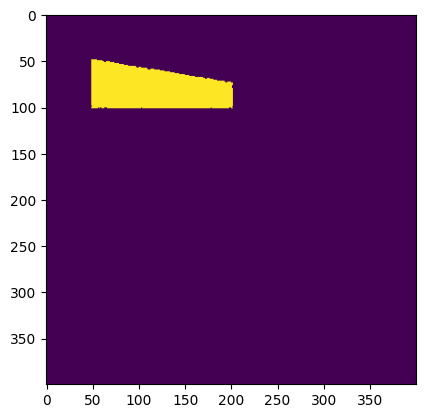

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = np.zeros((400, 400), dtype=np.uint8)

points = np.array([[0, 0],
    [0, 50],
    [150, 50],
    [150, 25]])
points = points + [50,50]
cv2.fillPoly(img, [points], 255)

mean = 0
std_dev = 20
gauss = np.random.normal(mean, std_dev, img.shape).astype(np.uint8)

kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(img, kernel, iterations=1)
mask = dilated - img

noisy_img = cv2.add(img, gauss * (mask>0))

cnts, hierarchy = cv2.findContours(noisy_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(cnts) > 0:     
    cnt = max(cnts, key=cv2.contourArea)

    # cnt = cv2.convexHull(cnt)
    
    epsilon = 0.002 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

img_pts = approx.reshape(-1, 2).astype(np.float32)
print(img_pts.shape)

points_3d = np.hstack([img_pts, np.zeros((img_pts.shape[0], 1))])

points_list = points_3d.astype(np.int32).tolist()

print(points_list)

contour_to_draw = approx  # shape: (N,1,2)
contour = np.zeros(img.shape, dtype=np.uint8)
cv2.drawContours(contour, [contour_to_draw], -1, 255, -1)

plt.imshow(contour)